# Logistic Regression

### Importing Libraries

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.io as pio
import seaborn as sns

# Importing Dataset

In [2]:
from sklearn.datasets import make_classification

In [3]:
x,y=make_classification(n_samples=1000,n_features=10,n_classes=2,random_state=42)


In [4]:
X = pd.DataFrame(x)

In [5]:
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=.3,random_state=42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(700, 10) (300, 10) (700,) (300,)


In [6]:
log_reg = LogisticRegression()
model_logic = log_reg.fit(x_train,y_train)

In [7]:
model_logic

LogisticRegression()

In [8]:
y_pred = model_logic.predict(x_test)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0])

In [9]:
y_prob = model_logic.predict_proba(x_test)

In [10]:
y_prob_df = pd.DataFrame(y_prob,columns=['Zero','One'])
y_prob_df

,Zero,One
0,0.774478,0.225522
1,0.033668,0.966332
2,0.670682,0.329318
3,0.079867,0.920133
4,0.976617,0.023383
...,...,...
295,0.276513,0.723487
296,0.177144,0.822856
297,0.387694,0.612306
298,0.087359,0.912641


In [11]:
px.scatter(y_prob_df['Zero'],y_prob_df['One'],color=y_prob_df['One']>0.5)

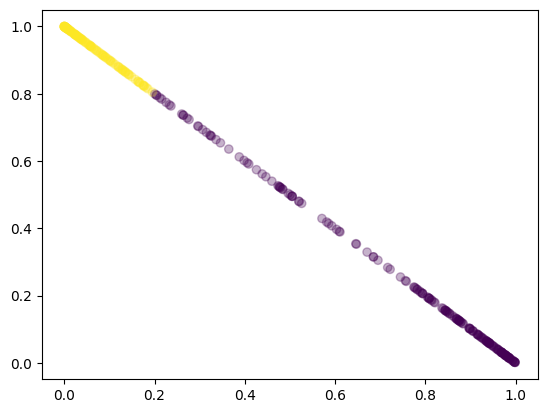

In [12]:
plt.scatter(y_prob_df['Zero'],y_prob_df['One'],c=y_prob_df['One']>0.8,alpha=0.3)

<Axes: xlabel='One', ylabel='Count'>

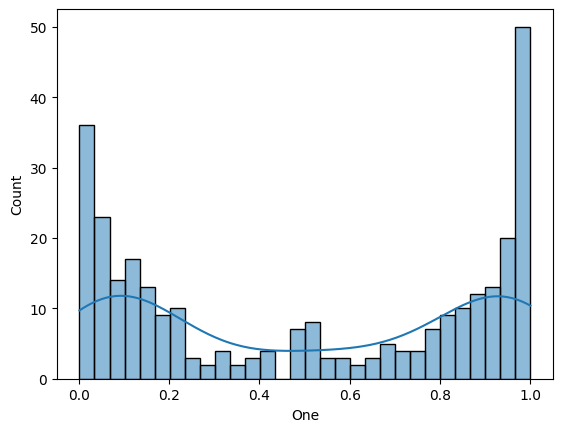

In [13]:
sns.histplot(y_prob_df['One'],kde=True,bins=30)

<BarContainer object of 2 artists>

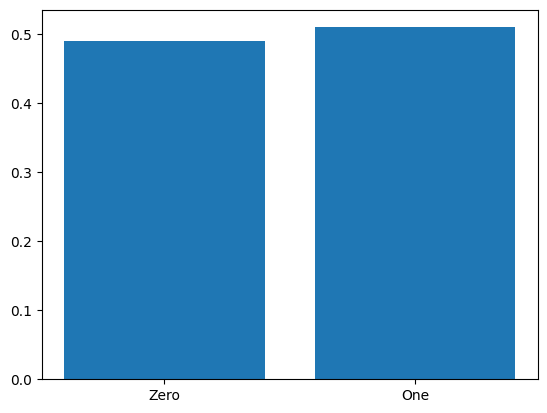

In [14]:
#y_prob_df.mean().plot(kind='bar')
plt.bar(y_prob_df.mean().index,y_prob_df.mean().values)

# Performance Matrix

In [15]:
score = accuracy_score(y_test,y_pred)
print(f"Accuracy Score : {score}")
print()
con_mat = confusion_matrix(y_test,y_pred)
print(f"confusion Matrix : \n \n {con_mat}")
print()
clas_rep = classification_report(y_test , y_pred)
print(f"Classification Report : \n \n {clas_rep}")

Accuracy Score : 0.8466666666666667

confusion Matrix : 
 
 [[118  17]
 [ 29 136]]

Classification Report : 
 
               precision    recall  f1-score   support

           0       0.80      0.87      0.84       135
           1       0.89      0.82      0.86       165

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



### Hyperperameter tunning and Cross Validation

In [20]:
model = LogisticRegression()
penalty = ['l1','l2','elasticnet']
c_values = [100,10,1.0,0.1,0.01,0.001]
solver = ['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga']

In [22]:
params = dict(penalty=penalty,solver=solver,C=c_values)

#### GridSearchCV

In [25]:
girid = GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=StratifiedKFold(),n_jobs=-1)

In [29]:
print(girid)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01, 0.001],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')


In [30]:
girid.fit(x_train,y_train)

p:\venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning:


300 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "p:\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "p:\venv\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "p:\venv\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01, 0.001],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [33]:
girid.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}